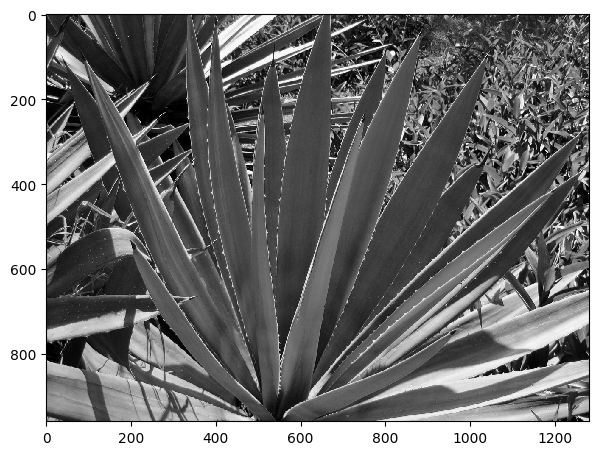

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
from scipy.signal import convolve2d
from math import *
import time
%matplotlib inline

plt.rcParams['figure.figsize'] = [7, 7]

def load_image(filename):
    img = np.asarray(Image.open(filename))
    img = img.astype("float32") / 255.
    return img

def gray2rgb(image):
    return np.repeat(np.expand_dims(image, 2), 3, axis=2)

def show_image(img):
    if len(img.shape) == 2:
        img = gray2rgb(img)
    plt.imshow(img, interpolation='nearest')

# load the image
im = load_image('D:\MULANGA\myproject\photos\phot4.jpg')
im = im.mean(axis=2) # convert to grayscale
show_image(im)


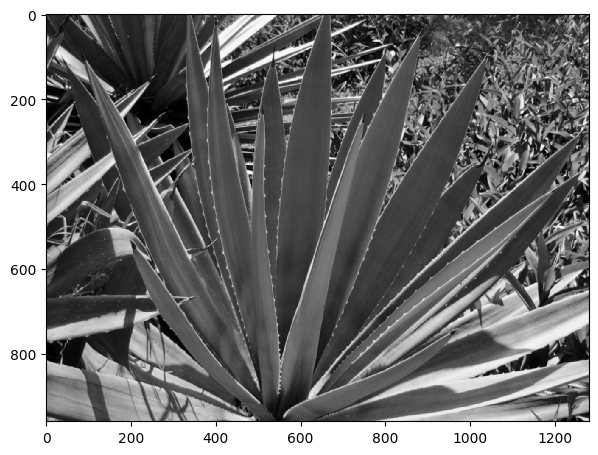

In [6]:
im_pad = np.pad(im, 5, mode='constant')  # pad the border of the original image
im_out = np.zeros_like(im)  # initialize the output image array

#for all pixels, replace the intensity with the mean of the neighbor values
    
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        neighbors = np.array([im_pad[i+4,j+4], im_pad[i+4,j+5], im_pad[i+4,j+6], im_pad[i+5,j+4], im_pad[i+5,j+5], im_pad[i+5,j+6], im_pad[i+6,j+4], im_pad[i+6,j+5], im_pad[i+6,j+6]])
        im_out[i,j] = np.mean(neighbors)


show_image(im_out)

In [9]:
def convolve_image(image, filter_matrix):
    
    im_pad = np.pad(image, 5, mode='constant') 
    im_conv = np.zeros_like(image)
    
    #the filter function takes in an image and a pair of indices and performs the convolution
    def filter_function(img, i, j):
        conv = np.zeros((3,3))
        for a in range(2,-1,-1):
            for b in range(2,-1,-1):
                conv[2-a, 2-b] = filter_matrix[a , b] * img[i+6-a,j+6-b]
                amt = np.sum(conv, axis = 0)
                mean = np.sum(amt, axis=0)
        return mean 

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            im_conv[i,j] = filter_function(im_pad,i,j)    
    return im_conv
    mean_filt = (1/9) * np.ones((3,3))
    show_image(convolve_image(im, mean_filt))

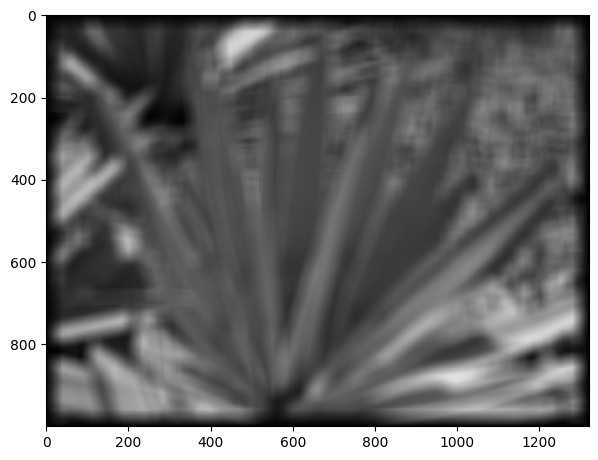

In [10]:
def gaussian_filter(sigma, k=20):
    #the function gaussian takes in a vector and calculates the gaussian for the values of the vector 
    def gaussian(x, sigma):
        gvec = 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-np.power(x/sigma,2)/2)
        return gvec 
    
    
    filter_x = np.linspace(-((2*k+1) // 2), (2*k+1) // 2, (2*k+1))
    for p in range(2*k+1):
        filter_x[p] = gaussian(filter_x[p], sigma)
    #take the outer product to go from 1D to 2D    
    kernel = np.outer(np.transpose(filter_x),np.transpose(filter_x))
    #normalize
    kernel = kernel/kernel.sum()
    return kernel 

show_image(convolve2d(im, gaussian_filter(100)))

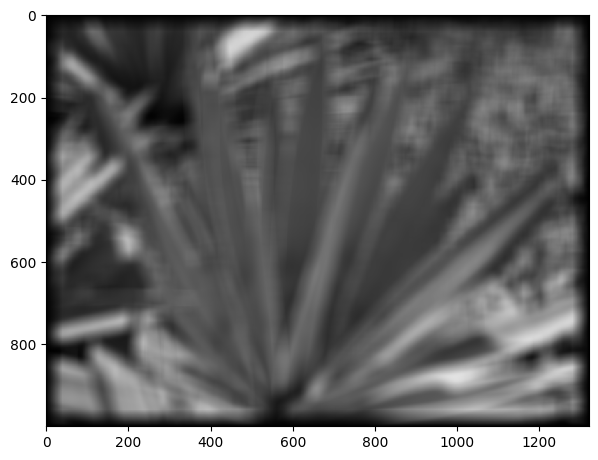

In [11]:
show_image(convolve2d(im, gaussian_filter(50)))

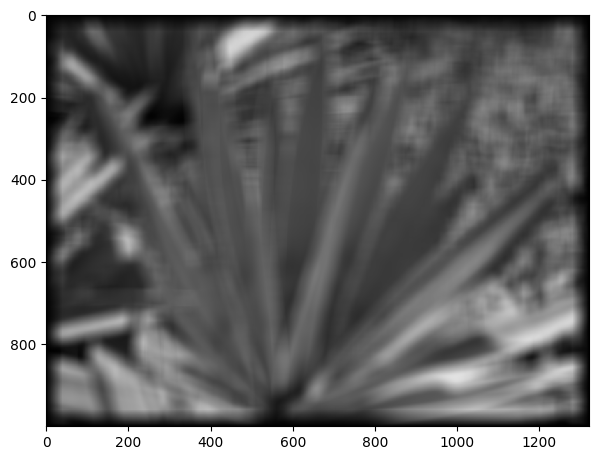

In [12]:
show_image(convolve2d(im, gaussian_filter(70)))